> ### **TEAM CONQUERORS**

---
**ASHIKA ANAND BABU**


1.   SJSU ID: 015966678
2.   MAIL ID: ashika.anandbabu@sjsu.edu

**RAMYA MAHESH**


1.   SJSU ID: 015968849
2.   MAIL ID: ramya.mahesh@sjsu.edu

**ANUSHA GANGASANI**


1.   SJSU ID: 015513160
2.   MAIL ID: anusha.gangasani@sjsu.edu

Setup Steps:
1. Enter input of a company name in the input section
2. Check output (output.csv) in the files section of the colab

# Environment Setup

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pygooglenews

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install fast_ml==3.68

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install neattext
import neattext as ntx

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install faker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!apt install libgraphviz-dev
!pip install pygraphviz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgraphviz-dev is already the newest version (2.40.1-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
from pygooglenews import GoogleNews
import re
import nltk
import json
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('vader_lexicon')
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from wordcloud import WordCloud, STOPWORDS
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
from nltk.corpus import subjectivity
%matplotlib inline 

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from faker import Faker
faker = Faker()
%matplotlib inline

# Data Preparation

In [ ]:
df_crunchbase = pd.read_csv('/content/drive/MyDrive/ML-Spring-2022/Conquerors/CrunchBase/dataset.csv')


In [ ]:
df_crunchbase.rename(columns={"Organization Name": "COMPANY", "Organization Name URL":"URL","Industries":"INDUSTRIES","Headquarters Location":"HEADQUARTERS","Description":"DESCRIPTION","CB Rank (Company)":"CB_RANK","Estimated Revenue Range": "REVENUE", "Total Funding Amount":"FUNDING","Total Funding Amount Currency":"IN_CURRENCY","Total Funding Amount Currency (in USD)":"FUNDING_IN_USD","IPO Status":"IPO_STATUS","Number of Acquisitions":"ACQUISITIONS", "Founders":"FOUNDERS"}, inplace=True)
df_crunchbase.head(10)

,COMPANY,URL,INDUSTRIES,HEADQUARTERS,DESCRIPTION,CB_RANK,REVENUE,FUNDING,IN_CURRENCY,FUNDING_IN_USD,IPO_STATUS,FOUNDERS,ACQUISITIONS
0,Intel,https://www.crunchbase.com/organization/intel,"Artificial Intelligence, Information Technolog...","Santa Clara, California, United States","Intel designs, manufactures, and sells integra...",1,$10B+,1.251000e+07,USD,1.251000e+07,Public,"Gordon Moore, Robert Noyce",108.0
1,Apollo,https://www.crunchbase.com/organization/apollo...,"Asset Management, Credit, Finance, Financial S...","New York, New York, United States",Apollo Global Management is an asset managemen...,2,$500M to $1B,3.994076e+08,USD,3.994076e+08,Public,"Josh Harris, Leon Black, Marc Rowan",84.0
2,NVIDIA,https://www.crunchbase.com/organization/nvidia,"Artificial Intelligence, GPU, Hardware, Softwa...","Santa Clara, California, United States","NVIDIA is a computing platform company, innova...",3,$10B+,3.500000e+07,USD,3.500000e+07,Public,"Chris Malachowsky, Curtis Priem, Jensen Huang",21.0
3,Coinbase,https://www.crunchbase.com/organization/coinbase,"Bitcoin, Blockchain, Cryptocurrency, E-Commerc...","San Francisco, California, United States",Coinbase is an online platform that allows mer...,4,$1B to $10B,5.690348e+08,USD,5.690348e+08,Public,"Brian Armstrong, Fred Ehrsam",22.0
4,WeWork,https://www.crunchbase.com/organization/wework,"Commercial Real Estate, Coworking, Property De...","New York, New York, United States",WeWork is a platform for creators that transfo...,5,$100M to $500M,2.194578e+10,USD,2.194578e+10,Public,"Adam Neumann, Miguel McKelvey, Rebekah Neumann",21.0
5,Liquidity,https://www.crunchbase.com/organization/liquid...,"Finance, Financial Services, Venture Capital","New York, New York, United States",Liquidity Capital is an investment firm that s...,6,NaN,7.950000e+08,USD,7.950000e+08,Private,"Oron Maymon, Ron Daniel, Yaron Sela",NaN
6,Nykaa,https://www.crunchbase.com/organization/nykaa,"Beauty, E-Commerce, Fashion, Lifestyle, Wellness","Mumbai, Maharashtra, India",Nykaa is an online marketplace for different b...,7,$100M to $500M,1.484586e+08,USD,1.484586e+08,Public,Falguni Nayar,5.0
7,Polygon,https://www.crunchbase.com/organization/polygo...,"Blockchain, Ethereum, Information Technology, ...","Bengaluru, Karnataka, India",Polygon is a platform for Ethereum scaling and...,8,NaN,4.504500e+08,USD,4.504500e+08,Private,"Anurag Arjun, Jaynti Kanani, Mihailo Bjelic, S...",2.0
8,Meta,https://www.crunchbase.com/organization/facebook,"Augmented Reality, Social Media, Social Networ...","Menlo Park, California, United States",Meta is a social technology company that enabl...,9,$10B+,1.612282e+10,USD,1.612282e+10,Public,"Andrew McCollum, Chris Hughes, Dustin Moskovit...",95.0
9,Lyft,https://www.crunchbase.com/organization/lyft,"Mobile Apps, Ride Sharing, Software, Transport...","San Francisco, California, United States","Lyft designs, markets, and operates a mobile a...",10,$1B to $10B,4.913607e+09,USD,4.913607e+09,Public,"John Zimmer, Logan Green, Matt Van Horn",12.0


# INPUT HERE
Please enter input here

Tested example: intel

In [ ]:
company = input("Enter company of interest: ")

Enter company of interest: intel


In [ ]:
print(company)

intel


In [ ]:
df_crunchbase['COMPANY'] = df_crunchbase['COMPANY'].str.lower()
company = company.lower()

In [ ]:
df_news = pd.DataFrame()

In [ ]:
def getNews(field):
  gn = GoogleNews()
  s = gn.search(field)
  x =[None]*100
  i=0
  for entry in s['entries']:
    x[i] = entry['title']
    i+=1
  print(x)
  df_news['TITLE'] = x

In [ ]:
founders = None
if company in df_crunchbase['COMPANY'].values:
  index = df_crunchbase.index[df_crunchbase['COMPANY']==company].tolist()
  founders = (df_crunchbase['FOUNDERS'].iloc[index]).to_string(index=False)
  news_string = founders.replace(",", " OR").strip()
  news_string = company + ' OR ' + news_string
  getNews(news_string)
  df_news.mask(df_news.eq('None')).dropna()
else:
  print('Company not in our cruchbase list, we will only be presenting news articles related to your input')
  getNews(company)
  df_news = df_news.mask(df_news.eq('None')).dropna()

['Everything PC S01E03 – ‘The story of Intel – part 1’ - TechCentral', 'Glory Days - Electronics Weekly', "Happy B'Day Gordon Moore: One Of The Founding Fathers Of Silicon Valley - Dazeinfo", "Moore's Law Is Dead. Now What? - Built In", 'Holacracy - Electronics Weekly', 'Happy Birthday to Gordon Moore – EEJournal - EE Journal', 'AMD Reported Record Revenue: Is AMD Stock A Good Buy During A Dip? - Seeking Alpha', 'The “Traitorous Eight” and the Rise of Fairchild Semiconductor - News - All About Circuits', 'AMD EPYC "Genoa" and "Turin" rumored to support a new SP6 socket, Genoa-X also planned - VideoCardz.com', "Moore's law: Why Is Moore's Law in Trouble? - Interesting Engineering", "10 facts you (probably) didn't know about Intel Corp.'s 50-year history, including its founding, original name, and more - Silicon Valley Business Journal - The Business Journals", 'MIT titles nanoscience building in honor of AMD CEO Dr. Lisa Su - Wccftech', 'Intel CEO Gelsinger spells out five-year renewal 

In [ ]:
df_news.count

<bound method DataFrame.count of                                                 TITLE
0   Everything PC S01E03 – ‘The story of Intel – p...
1                     Glory Days - Electronics Weekly
2   Happy B'Day Gordon Moore: One Of The Founding ...
3           Moore's Law Is Dead. Now What? - Built In
4                      Holacracy - Electronics Weekly
..                                                ...
95  And Now Let Us Praise, and Consider the Absurd...
96  A Rare Mix Created Silicon Valley's Startup Cu...
97  What you need to know about unions and Big Tec...
98  William Shockley: the failed man manager who i...
99                                               None

[100 rows x 1 columns]>

# Modeling

### Sentiment Analysis: NLTK Vader

In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
def find_sentiment_score(post):
    return sia.polarity_scores(post)["compound"] 

In [ ]:
def find_sentiment(post):
    if sia.polarity_scores(post)["compound"] > 0:
        return "Positive"
    elif sia.polarity_scores(post)["compound"] < 0:
        return "Negative"
    else:
        return "Neutral" 

In [ ]:
sentiments = [None]*100
sentiment_score = [None]*100
i = 0
for post in df_news['TITLE']:
  if post!=None:
    sentiments[i] = find_sentiment(post)
    sentiment_score[i] = find_sentiment_score(post)
    i+=1
  else:
    sentiments[i] = None
    sentiment_score[i] = None
    i+=1

df_news['SENTIMENT'] = sentiments
df_news['SCORE'] = sentiment_score

In [ ]:
df_news.head()

,TITLE,SENTIMENT,SCORE
0,Everything PC S01E03 – ‘The story of Intel – p...,Neutral,0.0000
1,Glory Days - Electronics Weekly,Positive,0.5423
2,Happy B'Day Gordon Moore: One Of The Founding ...,Positive,0.5719
3,Moore's Law Is Dead. Now What? - Built In,Negative,-0.6486
4,Holacracy - Electronics Weekly,Neutral,0.0000


In [ ]:
max_val = df_news['SCORE'].max()
min_val = df_news['SCORE'].min()
max_title = (df_news.loc[df_news.SCORE == max_val, 'TITLE'])
min_title = (df_news.loc[df_news.SCORE == min_val, 'TITLE'])
overall_sentiment = df_news['SCORE'].mean()

# Graph

In [ ]:
graph_df = df_news[:10]
graph_df.head()

,TITLE,SENTIMENT,SCORE
0,Everything PC S01E03 – ‘The story of Intel – p...,Neutral,0.0000
1,Glory Days - Electronics Weekly,Positive,0.5423
2,Happy B'Day Gordon Moore: One Of The Founding ...,Positive,0.5719
3,Moore's Law Is Dead. Now What? - Built In,Negative,-0.6486
4,Holacracy - Electronics Weekly,Neutral,0.0000


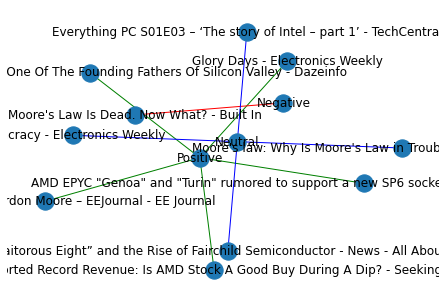

In [ ]:
import networkx as nx
from networkx.drawing.nx_agraph import to_agraph

G = nx.Graph()
G.add_node("Positive",color='green',style='filled',fillcolor='green')
G.add_node("Negative",color='red',style='filled',fillcolor='red')
G.add_node("Neutral",color='blue',style='filled',fillcolor='blue')
for index, row in graph_df.iterrows():
      if row['SENTIMENT'] == 'Positive':
        colour = 'g'
      if row['SENTIMENT'] == 'Negative':
        colour = 'r' 
      if row['SENTIMENT'] == 'Neutral':
        colour = 'b'    
      G.add_edge(row['TITLE'],row['SENTIMENT'],color=colour)
labels = {}
pos = nx.layout.kamada_kawai_layout(G)
colors = nx.get_edge_attributes(G,'color').values()
nx.draw(G, pos=pos, edge_color=colors, with_labels= True)


# OUTPUT

In [ ]:
investments = (df_crunchbase['FUNDING'].iloc[index])
acquisitions = (df_crunchbase['ACQUISITIONS'].iloc[index])
max_title = max_title.to_string(index=False)
min_title = min_title.to_string(index=False)

In [ ]:
if overall_sentiment > 0:
  overall_sentiment_value = "Positive - Good for Investment"
elif overall_sentiment < 0:
  overall_sentiment_value = "Negative - Not a good investment"
else:
  overall_sentiment_value = "Neutral - Can invest" 

In [ ]:
result_dict = { 'company_name' : [company], 'Company Founders' : [founders], 'Top positive news' : [max_title], 'Top negative news' : [min_title], 'Overall Sentiment' : [overall_sentiment_value], 'Investments' : [investments], 'Acquisition' : [acquisitions]}
result_df = pd.DataFrame(result_dict)
result_df.to_csv('output.csv', index = True)


Please check the files for "output.csv"

Our output looks like: 
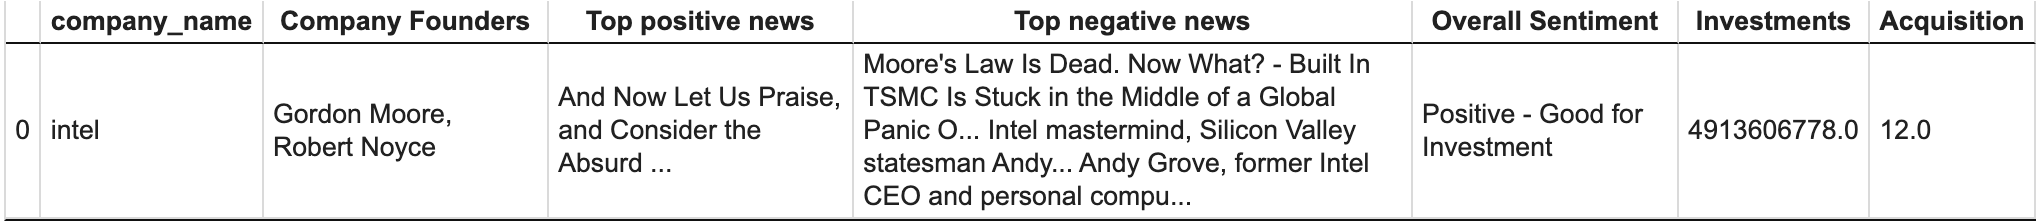